# Lọc Ảnh và Các Loại Bộ Lọc

## 1. Lọc Ảnh Là Gì?
Lọc ảnh là một kỹ thuật trong xử lý ảnh giúp thay đổi hoặc cải thiện hình ảnh ***bằng cách áp dụng các phép toán lên các pixel*** từ các pixel bên cạnh. Mục tiêu có thể là:
- Làm mịn ảnh
- Phát hiện cạnh
- Loại bỏ nhiễu
- Trích xuất thông tin hữu ích
#### nâng cao độ phân giải của ảnh --> bằng cách tăng pixel từ pixcel 1 màu ta tách thành 4 pixel từ các phương pháp nội suy 
Nội suy giúp tạo ra các pixel mới dựa trên giá trị của các pixel xung quanh. Các phương pháp phổ biến:
- Bilinear Interpolation: Tính toán giá trị trung bình của các pixel lân cận.
- Bicubic Interpolation: Sử dụng phương trình bậc ba để tạo ra các pixel mới, giúp ảnh mượt hơn.
- Lanczos Interpolation: Giữ chi tiết tốt hơn, phù hợp với ảnh có độ phân giải thấp.

## 2. Sự Khác Biệt Giữa Bộ Lọc Tuyến Tính và Phi Tuyến Tính
### Bộ lọc tuyến tính:
- Áp dụng phép toán dựa trên tổ hợp tuyến tính của các giá trị pixel trong vùng lân cận.
- Ví dụ: bộ lọc **trung bình**, **Gaussian**, **Sobel**.

### Bộ lọc phi tuyến tính:
- Không tuân theo nguyên tắc tuyến tính, thường sử dụng các phép toán như lấy **giá trị trung vị** để loại bỏ nhiễu.
- Ví dụ: bộ lọc **median filter**, **bilateral filter**, **adaptive filter**.

## 3. Tương Quan và Tích Chập
### Tương quan (*Correlation*):
- Được sử dụng để xác định mức độ giống nhau giữa một mẫu và một phần của ảnh.
- Ứng dụng: **Nhận dạng mẫu**, **truy tìm đối tượng**.

### Tích chập (*Convolution*):
- Là một biến thể của tương quan nhưng có thêm bước **lật ngược kernel** trước khi áp dụng lên ảnh.
- Ứng dụng: **Làm mờ**, **phát hiện cạnh**, **mô hình hóa CNN**.

## 4. Triển Khai Bộ Lọc Tuyến Tính và Phi Tuyến Tính
### Triển khai bộ lọc tuyến tính:
- Sử dụng **phép tích chập** với các kernel định sẵn như Gaussian hoặc Sobel.
- Dùng cho: **Làm mịn**, **phát hiện cạnh**, **làm sắc nét ảnh**.

### Triển khai bộ lọc phi tuyến tính:
- Sử dụng các kỹ thuật như **lọc trung vị**, **lọc thích ứng**, **lọc có hướng dẫn**.
- Giữ được chi tiết trong ảnh trong khi **giảm nhiễu**.

## 5. Tài Liệu Tham Khảo
- [Lọc tuyến tính trên MATLAB](https://www.mathworks.com/help/images/linear-filtering.html)
- [Giáo trình xử lý ảnh](https://www.cs.ubc.ca/~lsigal/425_2022W2/NotesW2.pdf)

---


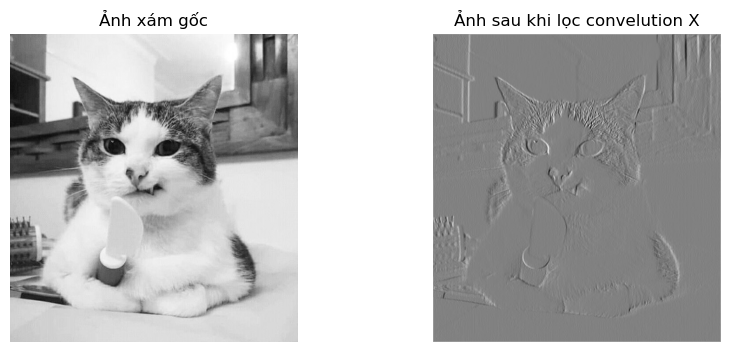

Kích thước ảnh đã lọc: 385200
Kích thước ảnh xám: 385200


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Đọc ảnh
img = plt.imread('D:/SUM25/CPV/code_at_home/cat.jpg')

# Chuyển ảnh sang xám bằng công thức tay (không dùng OpenCV)
img_grey = img[:, :, 0] * 0.299 + img[:, :, 1] * 0.587 + img[:, :, 2] * 0.114

# Hiển thị ảnh xám ban đầu
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Ảnh xám gốc")
plt.imshow(img_grey, cmap='gray')
plt.axis('off')

# Khởi tạo kernel Sobel theo trục X
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Tạo ảnh đầu ra
filtered_img = img_grey.copy()

# Áp dụng Sobel X filter (bỏ viền)
for i in range(1, img_grey.shape[0] - 1):
    for j in range(1, img_grey.shape[1] - 1):
        region = img_grey[i - 1:i + 2, j - 1:j + 2]
        filtered_img[i, j] = np.sum(region * sobel_x)

# Hiển thị ảnh sau khi lọc
plt.subplot(1, 2, 2)
plt.title("Ảnh sau khi lọc convelution X")
plt.imshow(filtered_img, cmap='gray')
plt.axis('off')

plt.show()

# In kích thước
print("Kích thước ảnh đã lọc:", filtered_img.size)
print("Kích thước ảnh xám:", img_grey.size)


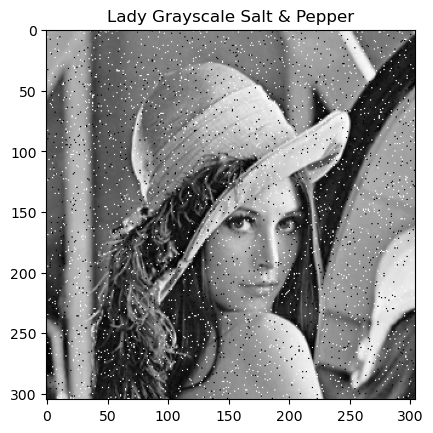

In [6]:
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('D:/SUM25/CPV/code_in_class/images/Lady_grayscale_salt_pepper.png')
if img.ndim == 3:
    # Nếu ảnh là RGB, chuyển sang xám thủ công
    img_gray = img[:, :, 0] * 0.299 + img[:, :, 1] * 0.587 + img[:, :, 2] * 0.114
else:
    img_gray = img  # Ảnh đã là grayscale

plt.imshow(img_gray, cmap='gray')
plt.title('Lady Grayscale Salt & Pepper')
plt.show()

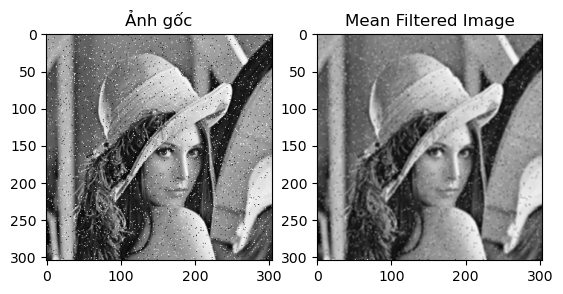

In [13]:
img = plt.imread('D:/SUM25/CPV/code_in_class/images/Lady_grayscale_salt_pepper.png')
if img.ndim == 3:
    # Nếu ảnh là RGB, chuyển sang xám thủ công
    img_gray = img[:, :, 0] * 0.299 + img[:, :, 1] * 0.587 + img[:, :, 2] * 0.114
else:
    img_gray = img  # Ảnh đã là grayscale

mean_filter = img_gray.copy()
plt.subplot(1, 2, 1)
plt.title('Ảnh gốc')
plt.imshow(img_gray, cmap='gray')

# Tính toán bộ lọc trung bình
m,n = 1,1
for m in range(1, img_gray.shape[0] - 1):
    for n in range(1, img_gray.shape[1] - 1):
        region = img_gray[m - 1:m + 2, n - 1:n + 2]
        mean_filter[m, n] = np.mean(region)

plt.subplot(1, 2, 2)
plt.title('Mean Filtered Image')
plt.imshow(mean_filter, cmap='gray')

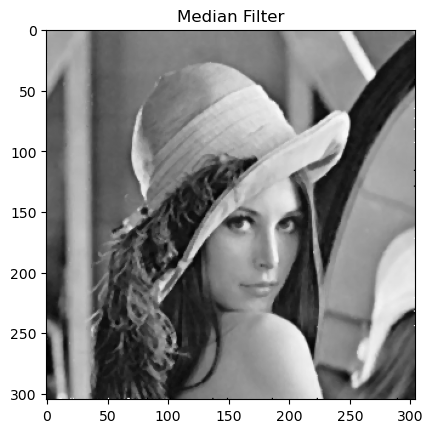

In [8]:
median_filtered = img_gray.copy()
m,n = 1 ,1

for m in range(1, img_gray.shape[0] - 1):
    for n in range(1, img_gray.shape[1] - 1):
        region = img_gray[m-1:m+2, n-1:n+2]
        median_filtered[m, n] = np.median(region)

plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filter')
plt.show()

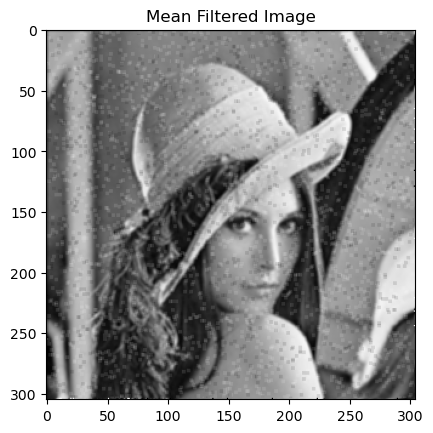

In [14]:
mean_filtered = img_gray.copy()
img_grey_pad = np.pad(img_gray, 1)
m,n = 1, 1
for m in range(1, img_gray.shape[0] - 1):
    for n in range(1, img_gray.shape[1] - 1):
        region = img_grey_pad[m-1:m+2, n-1:n+2]
        mean_filtered[m, n] = np.mean(region)
plt.title('Mean Filtered Image')
plt.imshow(mean_filtered, cmap='gray')
plt.show()

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("D:/SUM25/CPV/code_at_home/cat.jpg")
image = cv2.resize(image, (512, 512))
original = image.copy()

def nothing(x):
    pass
cv2.namedWindow("Color Balance")
cv2.createTrackbar("R", "Color Balance", 100, 200, nothing)
cv2.createTrackbar("G", "Color Balance", 100, 200, nothing)
cv2.createTrackbar("B", "Color Balance", 100, 200, nothing)

while True:
    key = cv2.waitKey(1) & 0xFF 

    r = cv2.getTrackbarPos("R", "Color Balance") / 100
    g = cv2.getTrackbarPos("G", "Color Balance") / 100
    b = cv2.getTrackbarPos("B", "Color Balance") / 100
    balanced = image.copy().astype(np.float32)
    balanced[:, :, 2] *= r
    balanced[:, :, 1] *= g
    balanced[:, :, 0] *= b
    balanced = np.clip(balanced, 0, 255).astype(np.uint8)

    if key == ord('q'):
        break
cv2.destroyAllWindows()